In [1]:
%env OMPL_PATH= /home/seiji/Research/ompl/py-bindings
from nonasymptotic.envs import GrayCodeWalls
from nonasymptotic.prm import SimplePRM

import matplotlib.pyplot as plt
import numpy as np
import itertools

env: OMPL_PATH=/home/seiji/Research/ompl/py-bindings


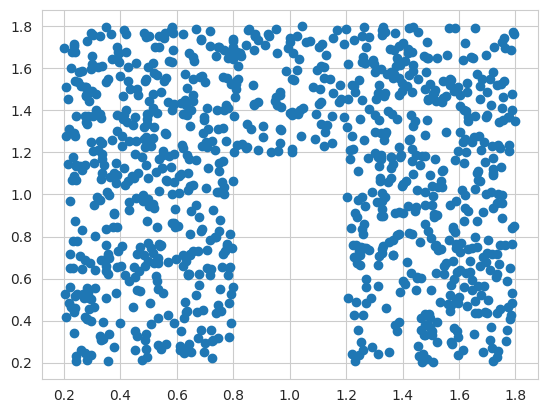

In [2]:
# visualizing 2D env
env_2d = GrayCodeWalls(2, 2, 0.2)
points = np.array([env_2d.sample_from_env() for _ in range(1000)])
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(points[:, 0], points[:, 1])
plt.show()


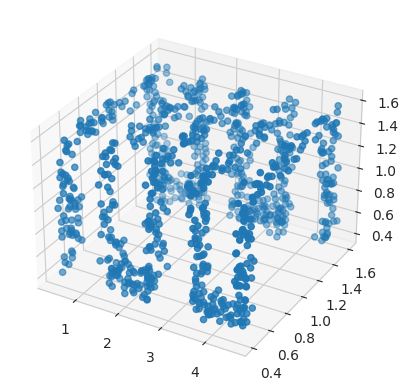

In [3]:
# visualizing 3D env
env_3d = GrayCodeWalls(3, 5, 0.4)
points = np.array([env_3d.sample_from_env() for _ in range(1000)])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(points[:, 0], points[:, 1], points[:, 2])
plt.show()


Wed Dec 20 11:15:38 2023 Building RP forest with 11 trees
Wed Dec 20 11:15:38 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	Stopping threshold met -- exiting after 2 iterations
Wed Dec 20 11:15:38 2023 Worst tree score: 0.99800000
Wed Dec 20 11:15:38 2023 Mean tree score: 0.99918182
Wed Dec 20 11:15:38 2023 Best tree score: 1.00000000
Wed Dec 20 11:15:38 2023 Forward diversification reduced edges from 30000 to 4168
Wed Dec 20 11:15:38 2023 Reverse diversification reduced edges from 4168 to 4168
Wed Dec 20 11:15:38 2023 Degree pruning reduced edges from 3722 to 3722
Wed Dec 20 11:15:38 2023 Resorting data and graph based on tree order
Wed Dec 20 11:15:38 2023 Building and compiling search function


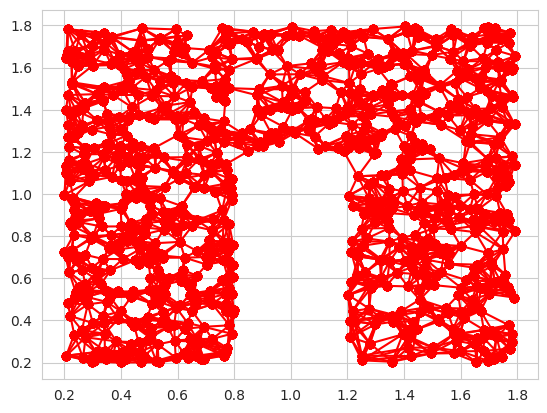

N Components: 1
N nodes: 1000
N edges: 6228


In [20]:
# visualizing a small PRM built on 2d env
prm_env_2d = GrayCodeWalls(2, 2, 0.2)
prm = SimplePRM(0.2, env_2d.is_motion_valid, env_2d.sample_from_env)
prm.grow_to_n_samples(1000)

plt.figure()
for u, v in prm.g_prm.iterEdges():
    coords_u = prm.samples[u]
    coords_v = prm.samples[v]
    
    plt.plot([coords_u[0], coords_v[0]], [coords_u[1], coords_v[1]], 'ro-')

plt.show()

# some other computations to help other visual tests later on:
print('N Components: %i' % len(prm.g_cc.getComponents()))
print('N nodes: %i' % prm.num_vertices())
print('N edges: %i' % prm.num_edges())


N nodes: 1000
N edges: 6228


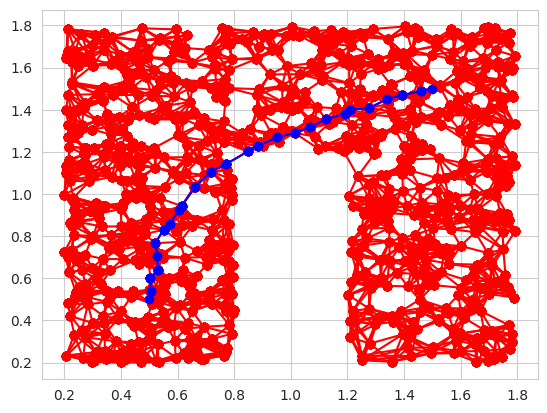

In [21]:
# do some connection queries with some existing points
s = np.array([0.5, 0.5])
g = np.array([1.5, 1.5])

sol_dist, sol_path = prm.query_solution(s, g)
sol_path = np.concatenate([[s], sol_path, [g]])

plt.figure()

# plot the existing prm
for u, v in prm.g_prm.iterEdges():
    coords_u = prm.samples[u]
    coords_v = prm.samples[v]

    plt.plot([coords_u[0], coords_v[0]], [coords_u[1], coords_v[1]], 'ro-')

for i in range(sol_path.shape[0] - 1):
    u = sol_path[i] 
    v = sol_path[i+1]
    plt.plot([u[0], v[0]], [u[1], v[1]], 'bo-')

plt.plot()
print('N nodes: %i' % prm.num_vertices())
print('N edges: %i' % prm.num_edges())
